##### The purpose of this project is to analyze NYC tourism businesses  

##### Source of data
Baruch college = https://www.baruch.cuny.edu/nycdata/tourism/index.html
Tripadvior = https://www.tripadvisor.com

### Packages 

In [470]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## wordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Data inspection

In [471]:
## Loading
data_1 = pd.read_csv('Baruch_site.csv')
data_2 = pd.read_csv('Tripadvisor.csv')

In [472]:
## converting to DataFrame 
data_1 = pd.DataFrame(data_1)
data_2 = pd.DataFrame(data_2)

In [473]:
## checking indexes
data_1.columns ## data_1 contains mostly business aspects tpye of data
data_2.columns ## data_2 contains rating of diferent site-sight locations

Index(['d_domestic', 'd_int', 'd_total', 'd_year', 'Unnamed: 4', 'hotel_adr',
       'hotel_aho', 'hotel_year', 'Unnamed: 8', 'e_direct_spend', 'e_taxes',
       'e_total_jobs', 'e_wages', 'e_year', 'Unnamed: 14', 'country', 'year13',
       'year14', 'year15', 'year16', 'year17', 'year18'],
      dtype='object')

Index(['numreviews', 'rating', 'title', 'types'], dtype='object')

In [474]:
## types in both Datasets
data_1.dtypes
data_2.dtypes

d_domestic        float64
d_int             float64
d_total           float64
d_year            float64
Unnamed: 4        float64
hotel_adr         float64
hotel_aho         float64
hotel_year        float64
Unnamed: 8        float64
e_direct_spend    float64
e_taxes           float64
e_total_jobs      float64
e_wages           float64
e_year            float64
Unnamed: 14       float64
country            object
year13              int64
year14              int64
year15              int64
year16              int64
year17              int64
year18              int64
dtype: object

numreviews      int64
rating        float64
title          object
types          object
dtype: object

In [475]:
## number of rows and columns
data_1.shape
data_2.shape

(22, 22)

(1123, 4)

In [476]:
data_1.head() ## First five rows 

,d_domestic,d_int,d_total,d_year,Unnamed: 4,hotel_adr,hotel_aho,hotel_year,Unnamed: 8,e_direct_spend,...,e_wages,e_year,Unnamed: 14,country,year13,year14,year15,year16,year17,year18
0,49.7,13.1,62.8,2017.0,NaN,276.0,0.871,2017.0,NaN,43.0,...,24.7,2016.0,NaN,International_,9272,9775,9883,10171,10510,10931
1,47.8,12.7,60.5,2016.0,NaN,279.0,0.869,2016.0,NaN,42.3,...,23.6,2015.0,NaN,Total Overseas_,7806,8283,8462,8795,9074,9438
2,46.2,12.3,58.5,2015.0,NaN,292.0,0.876,2015.0,NaN,41.2,...,22.5,2014.0,NaN,United Kingdom,1108,1175,1207,1239,1212,1259
3,44.5,12.0,56.5,2014.0,NaN,299.0,0.894,2014.0,NaN,38.8,...,20.6,2013.0,NaN,China (PRC)_,647,746,870,951,1038,1107
4,42.8,11.5,54.3,2013.0,NaN,289.0,0.882,2013.0,NaN,36.9,...,19.7,2012.0,NaN,Canada,1080,1068,965,928,970,1005


In [477]:
data_2.head() ## First five rows 

,numreviews,rating,title,types
0,0,0.0,Wally Findley Galleries,Museums Shopping
1,0,0.0,Jade Gary,Classes & Workshops Outdoor Activities
2,1,4.0,Acquavella Galleries,Shopping Museums
3,0,0.0,Church Of The Holy Name Of Jesus,Sights & Landmarks Churches & Cathedrals
4,1,5.0,Carter Burden Gallery,Museums Shopping


In [478]:
## data_1 renaming and cleaning up
np.sum(data_1.isnull()) ## removing both nunname: 4 and 8 

d_domestic         4
d_int              4
d_total            5
d_year             4
Unnamed: 4        22
hotel_adr          4
hotel_aho          4
hotel_year         4
Unnamed: 8        22
e_direct_spend     8
e_taxes            8
e_total_jobs       8
e_wages            8
e_year             8
Unnamed: 14       22
country            0
year13             0
year14             0
year15             0
year16             0
year17             0
year18             0
dtype: int64

In [479]:
drop_columns = ['Unnamed: 4','Unnamed: 8','hotel_year','e_year','Unnamed: 14']
data_1.drop(drop_columns, axis = 1, inplace = True) ## remove empty columns and duplicates
data_1.head()

,d_domestic,d_int,d_total,d_year,hotel_adr,hotel_aho,e_direct_spend,e_taxes,e_total_jobs,e_wages,country,year13,year14,year15,year16,year17,year18
0,49.7,13.1,62.8,2017.0,276.0,0.871,43.0,11.5,383400.0,24.7,International_,9272,9775,9883,10171,10510,10931
1,47.8,12.7,60.5,2016.0,279.0,0.869,42.3,11.1,375268.0,23.6,Total Overseas_,7806,8283,8462,8795,9074,9438
2,46.2,12.3,58.5,2015.0,292.0,0.876,41.2,10.5,362085.0,22.5,United Kingdom,1108,1175,1207,1239,1212,1259
3,44.5,12.0,56.5,2014.0,299.0,0.894,38.8,9.7,348157.0,20.6,China (PRC)_,647,746,870,951,1038,1107
4,42.8,11.5,54.3,2013.0,289.0,0.882,36.9,9.3,339303.0,19.7,Canada,1080,1068,965,928,970,1005


In [480]:
## Spliting datam, reset indexs
data_a = data_1.iloc[:,:10]
data_b = data_1.iloc[:,10:]
data_a = data_a.dropna(axis = 0, how ='any')
data_a.d_year = data_a.d_year.astype('int')

In [481]:
## reset_index
data_a.set_index('d_year', inplace = True)
data_b.set_index('country', inplace = True)

In [482]:
data_b.head()

,year13,year14,year15,year16,year17,year18
country,,,,,,
International_,9272,9775,9883,10171,10510,10931
Total Overseas_,7806,8283,8462,8795,9074,9438
United Kingdom,1108,1175,1207,1239,1212,1259
China (PRC)_,647,746,870,951,1038,1107
Canada,1080,1068,965,928,970,1005


### Analysis

In [530]:
## Tripadvisor first
group = data_2.groupby(['types', 'numreviews']).max()
group.sort_values(by = ['numreviews'], ascending = False, inplace = True)
group.head(10) ## top 15 Categories.

rating  \
types                                             numreviews           
Sights & Landmarks,Nature & Parks                 130083         4.5   
Sights & Landmarks,Museums                        92537          4.5   
Sights & Landmarks,Points of Interest & Landmarks 86585          4.5   
Sights & Landmarks,Lookouts                       77381          4.5   
Nature & Parks,Sights & Landmarks                 61087          4.5   
Sights & Landmarks,Museums                        53764          5.0   
Sights & Landmarks,Points of Interest & Landmarks 43086          4.5   
                                                  42254          4.5   
                                                  29542          4.5   
Sights & Landmarks,Observation Decks & Towers     26351          4.5   

                                                                                            title  
types                                             numreviews                                       
Sights & Landmarks,Nature & Parks                 130083                             Central Park  
Sights & Landmarks,Museums                        92537       The National 9/11 Memorial & Museum  
Sights & Landmarks,Points of Interest & Landmarks 86585                     Empire State Building  
Sights & Landmarks,Lookouts                       77381                           Top of the Rock  
Nature & Parks,Sights & Landmarks                 61087                             The High Line  
Sights & Landmarks,Museums                        53764            The Metropolitan Museum of Art  
Sights & Landmarks,Points of Interest & Landmarks 43086                    Grand Central Terminal  
                                                  42254                         Statue of Liberty  
                                                  29542                                  Broadway  
Sights & Landmarks,Observation Decks & Towers     26351                     One World Observatory

In [531]:
## top locations with highest reviews
group1 = data_2.groupby(['title', 'numreviews','rating']).max()
group1.sort_values(by = 'numreviews', ascending = False, inplace = True)
group1.head(10)

,,,types
title,numreviews,rating,
Central Park,130083,4.5,"Sights & Landmarks,Nature & Parks"
The National 9/11 Memorial & Museum,92537,4.5,"Sights & Landmarks,Museums"
Empire State Building,86585,4.5,"Sights & Landmarks,Points of Interest & Landmarks"
Top of the Rock,77381,4.5,"Sights & Landmarks,Lookouts"
The High Line,61087,4.5,"Nature & Parks,Sights & Landmarks"
The Metropolitan Museum of Art,53764,5.0,"Sights & Landmarks,Museums"
Grand Central Terminal,43086,4.5,"Sights & Landmarks,Points of Interest & Landmarks"
Statue of Liberty,42254,4.5,"Sights & Landmarks,Points of Interest & Landmarks"
Broadway,29542,4.5,"Sights & Landmarks,Points of Interest & Landmarks"


<Figure size 504x504 with 0 Axes>

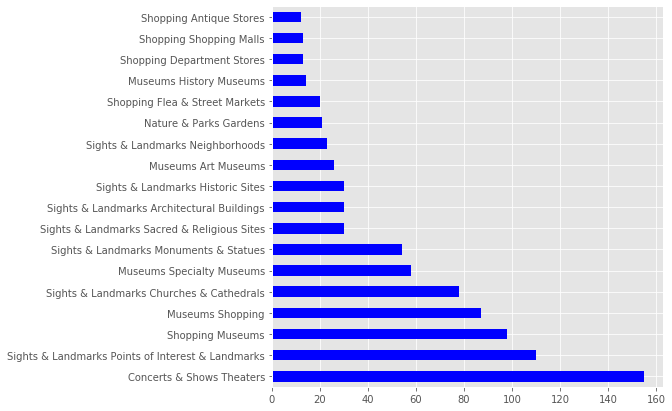

In [532]:
numType = data_2['types'].value_counts()
numType = numType[numType > 10]
plt.figure(figsize=[7,7])
numType.plot(kind = "barh", color='b')

In [487]:
## WordCloud
text1 = " ".join(review for review in data_2['title'])
print ("There are {} words in the combination of all review.".format(len(text1)))

There are 24977 words in the combination of all review.


In [488]:
df = group1.iloc[:30].reset_index()
lst = str(df['title'])

<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

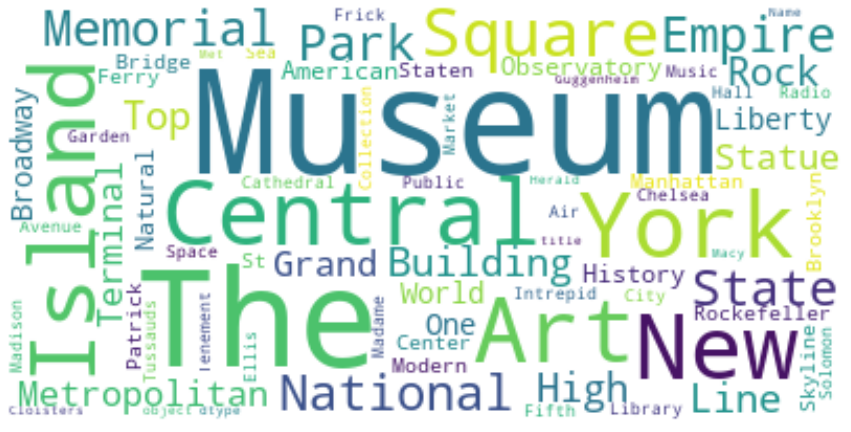

In [489]:
## wordcloud of locations
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(lst)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [533]:
## Baruch site
data_a
data_a.columns

,d_domestic,d_int,d_total,hotel_adr,hotel_aho,e_direct_spend,e_taxes,e_total_jobs,e_wages
d_year,,,,,,,,,
2017,49.7,13.1,62.8,276.0,0.871,43.0,11.5,383400.0,24.7
2016,47.8,12.7,60.5,279.0,0.869,42.3,11.1,375268.0,23.6
2015,46.2,12.3,58.5,292.0,0.876,41.2,10.5,362085.0,22.5
2014,44.5,12.0,56.5,299.0,0.894,38.8,9.7,348157.0,20.6
2013,42.8,11.5,54.3,289.0,0.882,36.9,9.3,339303.0,19.7
2012,41.8,10.9,52.7,281.0,0.874,34.5,8.8,324605.0,18.6
2011,40.3,10.6,50.9,273.0,0.852,31.5,8.1,310156.0,17.3
2010,39.0,9.8,48.8,261.0,0.855,28.2,7.5,303649.0,16.6
2009,37.0,8.8,45.8,237.0,0.815,32.0,8.3,313997.0,17.2


Index(['d_domestic', 'd_int', 'd_total', 'hotel_adr', 'hotel_aho',
       'e_direct_spend', 'e_taxes', 'e_total_jobs', 'e_wages'],
      dtype='object')

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

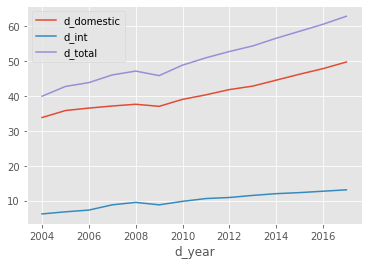

In [491]:
## number of visitors 
group2 = data_a.iloc[:,:3]
plt.figure(figsize=[15,10])
group2.plot()

In [492]:
## pie 
data_a.d_domestic.sum()
data_a.d_int.sum()
data_a.d_total.sum()

569.9

140.29999999999998

710.3

([<matplotlib.patches.Wedge at 0x7fc13819a150>,
 [Text(-0.6396949052563363, -0.8948689447003326, 'Domestic'),
  Text(0.6396947795808139, 0.8948690345391632, 'International')],
 [Text(-0.34892449377618345, -0.48811033347290866, '80.2%'),
  Text(0.34892442522589845, 0.4881103824759071, '19.8%')])

(-1.1005902698252417,
 1.10151036914468,
 -1.1010147422404108,
 1.1000483824169576)

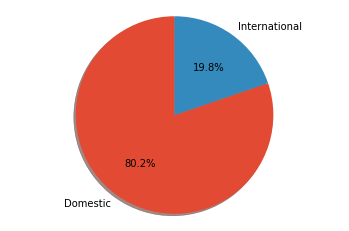

In [493]:
## pie
pie = data_a.iloc[:,:2].sum()
labels = 'Domestic','International'
num = [pie[0],pie[1]]
fig1, ax1 = plt.subplots()
ax1.pie(num, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 576x432 with 0 Axes>

0.8602142857142858

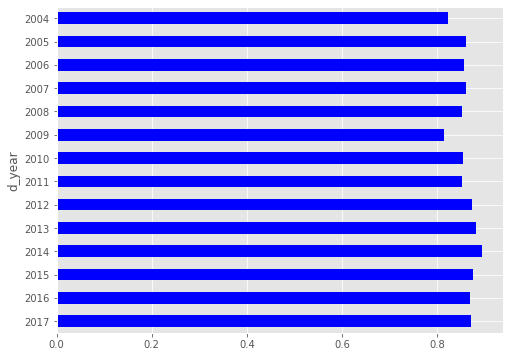

In [494]:
## hotel
plt.figure(figsize=[8,6])
data_a.hotel_aho.plot(kind='barh', color='b')
data_a.hotel_aho.mean()

<Figure size 576x432 with 0 Axes>

272.42857142857144

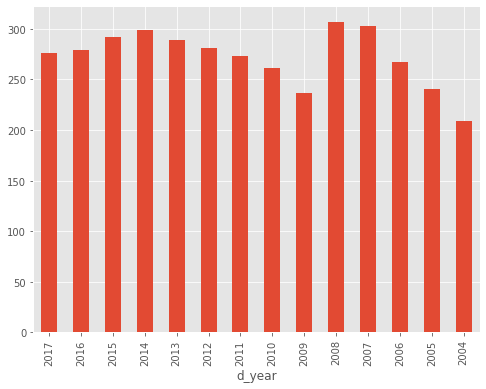

In [495]:
plt.figure(figsize=[8,6])
data_a.hotel_adr.plot.bar()
data_a.hotel_adr.mean()

In [496]:
data_a.columns

Index(['d_domestic', 'd_int', 'd_total', 'hotel_adr', 'hotel_aho',
       'e_direct_spend', 'e_taxes', 'e_total_jobs', 'e_wages'],
      dtype='object')

In [497]:
data_a.iloc[:,5:].mean()

e_direct_spend        32.050000
e_taxes                8.085714
e_total_jobs      345445.214286
e_wages               18.035714
dtype: float64

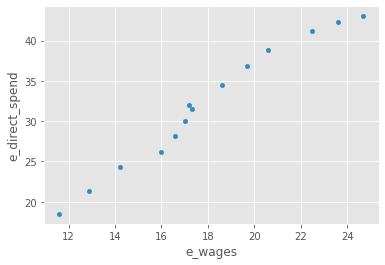

In [498]:
data_a.plot.scatter(x='e_wages', y='e_direct_spend')

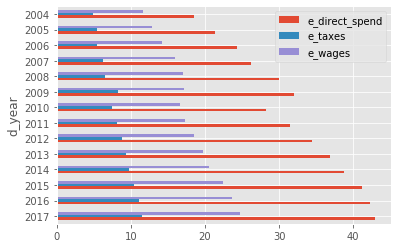

In [499]:
data_a[['e_direct_spend','e_taxes','e_wages']].plot(kind='barh')

In [500]:
## recent six years
data_b
## total overseas excluding Canada and Mexco

,year13,year14,year15,year16,year17,year18
country,,,,,,
International_,9272,9775,9883,10171,10510,10931
Total Overseas_,7806,8283,8462,8795,9074,9438
United Kingdom,1108,1175,1207,1239,1212,1259
China (PRC)_,647,746,870,951,1038,1107
Canada,1080,1068,965,928,970,1005
Brazil,895,921,877,818,852,906
France,697,734,727,745,767,814
Australia,619,639,665,684,693,714
Germany,607,628,632,648,639,613


In [501]:
text1 = " ".join(review for review in data_1['country'].iloc[2:])
print ("There are a total of {} countries ".format(len(text1)))

There are a total of 174 countries 


<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

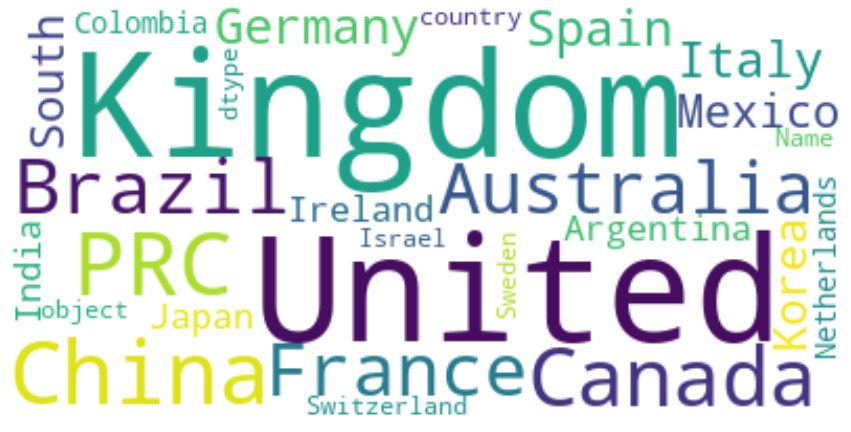

In [502]:
text = str(data_1['country'].iloc[2:])
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(text)
plt.figure(figsize=[15,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

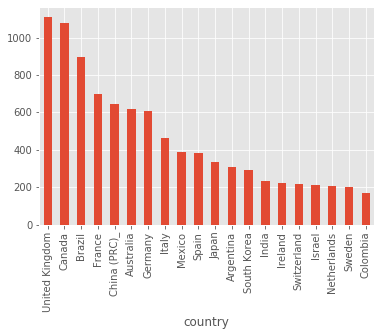

In [503]:
## top international visitors each year
data_b.iloc[2:]['year13'].sort_values(ascending = False).plot.bar()

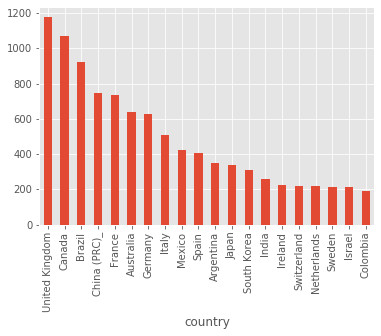

In [504]:
data_b.iloc[2:]['year14'].sort_values(ascending = False).plot.bar()

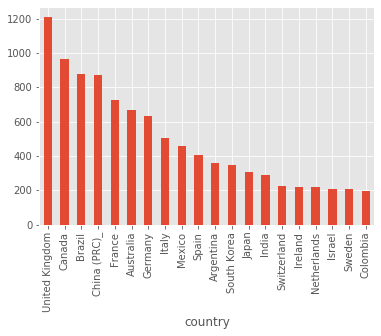

In [505]:
data_b.iloc[2:]['year15'].sort_values(ascending = False).plot.bar()

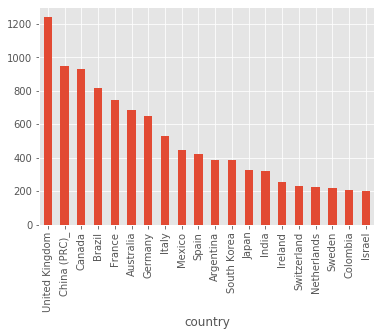

In [506]:
data_b.iloc[2:]['year16'].sort_values(ascending = False).plot.bar()

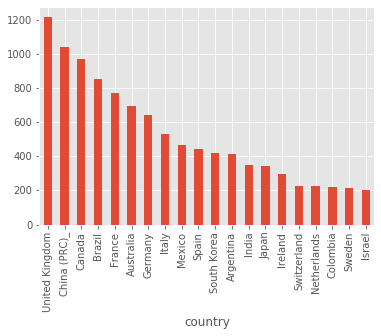

In [507]:
data_b.iloc[2:]['year17'].sort_values(ascending = False).plot.bar()

In [522]:
def get_mean(x):
    mean = np.mean(x)
    return mean
data_b['mean_countries'] = data_b.iloc[:,0:].apply(get_mean, axis = 1).astype(int)

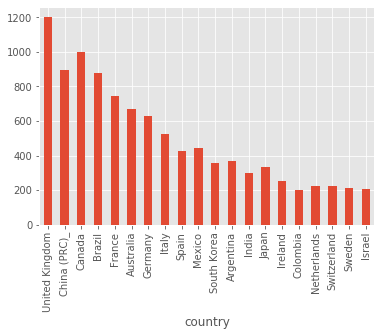

In [529]:
## top visitors'countries in average
data_b['mean_countries'].iloc[2:].plot.bar()